In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

#Importando o modelo machine learnig
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [175]:
# importar csv
data = pd.read_csv("nge_dados_input.csv")


In [176]:
data.head()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
0,224323,0,0,1,0,87,140.0,116142,470,685,60.0,140
1,224325,0,0,1,0,82,122.0,108307,76,94,69.0,122
2,225392,0,0,3,0,41,70.0,41144,28,24,23.0,52
3,225392,0,0,3,0,41,70.0,62913,397,639,21.0,52
4,225531,0,0,2,0,36,48.0,37548,233,397,17.0,48


In [177]:
#
# normalizar a quantidade de caracteres
#
#data.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [178]:
#
# normalizar a quantidade de caracteres
#

# X["qtd_carc_normal"]=(X.qtd_carc-X.qtd_carc.min())/(X.qtd_carc.max()-X.qtd_carc.min())

In [179]:
data.dtypes
# baixa complexidade ==> 48 páginas 
# media complexidade ==> 49/64 páginas
# alta complexidade  ==> 65 acima

id                    int64
entidade              int64
fornecedor            int64
complexidade          int64
stat_pagto            int64
qtd_pag_word          int64
qtd_pag_estimado    float64
qtd_carc              int64
qtd_tabela            int64
qtd_image             int64
qtd_estilos         float64
pag_final             int64
qtd_carc_normal     float64
dtype: object

In [180]:
data.columns

Index(['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word', 'qtd_pag_estimado', 'qtd_carc', 'qtd_tabela',
       'qtd_image', 'qtd_estilos', 'pag_final', 'qtd_carc_normal'],
      dtype='object')

In [181]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']

colunas_y=['pag_final']
#colunas_y=['id',  'pag_final']

X = data[colunas_X]
y = data[colunas_y]

In [182]:
X.tail()

,complexidade,qtd_pag_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos
88,2,24,31123,21,17,23.0
89,2,24,31123,7,8,23.0
90,1,59,122719,363,323,23.0
91,1,48,81475,115,205,23.0
92,1,100,74242,132,224,16.0


In [183]:
data

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,qtd_carc_normal
0,224323,0,0,1,0,87,140.0,116142,470,685,60.0,140,0.202882
1,224325,0,0,1,0,82,122.0,108307,76,94,69.0,122,0.189171
2,225392,0,0,3,0,41,70.0,41144,28,24,23.0,52,0.071636
3,225392,0,0,3,0,41,70.0,62913,397,639,21.0,52,0.109732
4,225531,0,0,2,0,36,48.0,37548,233,397,17.0,48,0.065343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,235502,0,0,2,0,24,48.0,31123,21,17,23.0,36,0.054099
89,235502,0,0,2,0,24,48.0,31123,7,8,23.0,36,0.054099
90,235519,0,0,1,0,59,90.0,122719,363,323,23.0,78,0.214392
91,235512,0,0,1,0,48,75.0,81475,115,205,23.0,66,0.142215


In [184]:
data.describe()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,qtd_carc_normal
count,93.000000,93.000000,93.000000,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,93.00000,93.000000,93.000000
mean,229600.838710,0.258065,0.010753,1.365591,0.0,64.290323,97.903226,83783.344086,236.956989,324.053763,26.16129,82.569892,0.146254
std,24216.403563,0.587982,0.103695,0.604061,0.0,65.248119,72.444291,91171.351973,143.635250,212.378884,14.90644,64.709283,0.159549
min,3.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,209.000000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,230571.000000,0.000000,0.000000,1.000000,0.0,33.000000,48.000000,31123.000000,115.000000,162.000000,19.00000,46.000000,0.054099
50%,232872.000000,0.000000,0.000000,1.000000,0.0,50.000000,80.000000,69135.000000,239.000000,280.000000,23.00000,70.000000,0.120620
75%,233895.000000,0.000000,0.000000,2.000000,0.0,78.000000,120.000000,103663.000000,357.000000,458.000000,31.00000,96.000000,0.181044
max,235519.000000,2.000000,1.000000,3.000000,0.0,543.000000,420.000000,571640.000000,526.000000,792.000000,71.00000,386.000000,1.000000


In [185]:
y.head()

,pag_final
0,140
1,122
2,52
3,52
4,48


# Normalizar?

In [ ]:
# padronização/escalonamento dos dados.
#
# Escalas Diferentes Podem Ser um Problema? Normalizar?
# https://www.linkedin.com/pulse/pr%C3%A9-processamento-de-dados-intui%C3%A7%C3%A3o-e-pr%C3%A1tica-em-lucas-thiago-zane/
# https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa
#
#

In [ ]:
# O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum,
# sem distorcer as diferenças nos intervalos de valores.
# Esse método é necessário apenas quando os parâmetros tiverem intervalos muito diferentes.

In [ ]:
# a normalização não é necessária para a Regressão Logística.
# a normalização poderá fazer sentido no tratamento de outliers.
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas,
# como é o caso das regressões lineares multivariadas.
# random florest não envolvem o uso de distâncias euclidianas.

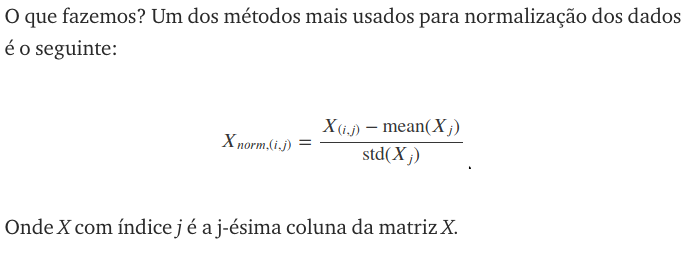

In [84]:
# O que essa fórmula está dizendo é que pra cada observação em ambas as variáveis,
# eu respondo a seguinte pergunta:quantos desvios padrões esse valor está longe da média? 

In [ ]:
# “E se eu quiser modelar um classificador usando Regressão Logística, eu precisaria normalizar meus dados?”
# Tecnicamente falando, a normalização não é necessária para a Regressão Logística, 
# pois ela trata com probabilidades relacionadas as classes envolvidas, 
# se preocupa em desenhar um “fronteira” de decisão em torno de um limiar (o famoso threshold).
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, 
# como é o caso das regressões lineares multivariadas. 

In [ ]:
# Os algoritmos de otimização:
#Adaptive Gradient (AdaGrad)
#Stochastic Gradient Descent (SGD)
#Gradiente Descendente com Momentum (momentum)
#Adaptative Delta Learning (adadelta)
#Nesterov Accelerated Gradient (nag)
#Otimizador RMSprop (rmsprop)


### normalização (StandardScaler)

from sklearn.preprocessing import StandardScaler

- sc_X = StandardScaler()
- X_train = sc_X.fit_transform(X_train)
- X_test = sc_X.transform(X_test)

- sc_y = StandardScaler()
- y_train = sc_y.fit_transform(y_train)

#### Uma maneira fácil de usar o Pandas : (aqui eu quero usar a normalização média)

- normalized_df=(df-df.mean())/df.std()
#### para usar a normalização min-max:

- normalized_df=(df-df.min())/(df.max()-df.min())

#### Você pode usar o pacote sklearn e seus utilitários de pré-processamento associados para normalizar os dados.

- import pandas as pd
- from sklearn import preprocessing

- x = df.values #returns a numpy array
- min_max_scaler = preprocessing.MinMaxScaler()
- x_scaled = min_max_scaler.fit_transform(x)
- df = pd.DataFrame(x_scaled)

In [70]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# RANDOM FOREST
########################################################

In [71]:
# instalar biblioteca scikit-learn
#! pip install -U scikit-learn

In [186]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [187]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83, 6), (10, 6), (83, 1), (10, 1))

In [188]:
y_test.head()

,pag_final
40,340
22,98
55,34
72,38
0,140


In [189]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_train, y_train)

<ipython-input-189-957cc5138365>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [190]:
p = modelo.predict(X_test)

In [191]:
p

array([ 96, 110,  28,  34, 100,  48,  48,  20,  48, 104])

In [192]:
print(p.shape,y_test.shape)

(10,) (10, 1)


In [193]:
y_test

,pag_final
40,340
22,98
55,34
72,38
0,140
26,72
39,42
67,22
10,40
44,98


In [194]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,p)))
# RMSE:  78.92781512242689
# RMSE:  78.58244078673046

RMSE:  78.77055287351993


In [ ]:
##############################################################################################################

In [ ]:
#########################################################
# FIM RANDOM FOREST
########################################################

In [ ]:
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# Criando uma lista com os nomes dos atributos
#feature_cols = ['age','sex','bmi','children','smoker']

# Usando a lista para escolher um subconjunto do dataframe original
#X = data[feature_cols]

# Selecionando a Série no dataframe
#y = data.charges

# Dividindo entre conjunto de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajsutando o modelo (Aprendendo os coeficientes)
#linreg.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
#y_pred = linreg.predict(X_test)

# Calculando RMSE para nossas predições
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
##############################################################################################################

In [ ]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# LINEAR REGRESSION
########################################################

In [195]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', "qtd_carc_normal",'qtd_tabela','qtd_image']
colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]



#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [196]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1)

In [197]:
X_train

,complexidade,qtd_pag_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos
40,1,195,413596,26,20,19.0
31,1,63,97543,524,789,28.0
90,1,59,122719,363,323,23.0
27,1,83,186373,150,251,38.0
38,2,34,56358,104,119,25.0
...,...,...,...,...,...,...
75,1,207,571640,303,264,24.0
9,2,18,145038,169,341,35.0
72,2,19,16370,357,317,23.0
12,1,57,1176,209,392,2.0


In [198]:
##### machine learnig

#Instanciando o estimador
linreg = LinearRegression()

#Ajustando o modelo ao conjunto de treino
linreg.fit(X_train, y_train)

#Interpretando os coeficientes do modelo
#Visualizando a interseção e os coeficientes 
print(linreg.intercept_)
print(linreg.coef_)


[39.91188536]
[[-1.12598804e+01  6.95461224e-01  2.54639254e-04  1.17609369e-02
  -9.42819675e-03 -2.80477466e-01]]


In [199]:
colunas_X

['complexidade',
 'qtd_pag_word',
 'qtd_carc',
 'qtd_tabela',
 'qtd_image',
 'qtd_estilos']

In [200]:
X_train.columns

Index(['complexidade', 'qtd_pag_word', 'qtd_carc', 'qtd_tabela', 'qtd_image',
       'qtd_estilos'],
      dtype='object')

In [201]:
#Atributos e seus coeficientes
list(zip(colunas_X, linreg.coef_))

[('complexidade',
  array([-1.12598804e+01,  6.95461224e-01,  2.54639254e-04,  1.17609369e-02,
         -9.42819675e-03, -2.80477466e-01]))]

In [202]:
#Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

In [203]:
y_pred

array([[ 37.49664056],
       [ 61.86796013],
       [115.28497295],
       [ 47.50320228],
       [ 35.64405006],
       [ 85.33434495],
       [ 78.59263703],
       [155.23900812],
       [ 65.72600636],
       [ 47.0220136 ]])

In [204]:
y_test

,pag_final
59,52
74,68
44,98
56,48
88,36
77,86
62,68
53,126
54,68
39,42


Comparando essas métricas:

- MAE é a mais fácil de entender.
- MSE é mais popular que MAE, porque MSE "pune" erros grandes.
- RMSE é ainda mais popular que MSE, porque RMSE é interpretável na mesma unidade de y.

In [206]:
#RMSE:  12.11799697428631 # primeiro test com columas
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#RMSE:  11.831745496309976
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
# RMSE:  8.41739234335301

In [208]:
#Nós precisamos de uma métrica de avaliação para comparar nossas predições com os valores verdadeiros!

# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# incluido feature Quantidade de estilo, mas o resultado piorou. RMSE foi de 11.83 para 12.43

RMSE:  12.43000991830557


In [63]:
#Como interpretar esse valor?
# numero menor de RMSE é melhor
# RMSE:  11.831745496309976


In [ ]:
#########################################################
# FIM  LINEAR REGRESSION
########################################################

In [ ]:
################################################################################################################
#########################################################
# LOGISTIC REGRESSION
########################################################

In [222]:
colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20,random_state=1)

In [224]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
##### machine learnig
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X_test.fillna(-1)))
print(clf.predict_proba(X_test.fillna(-1)))
print(clf.score(X_train, y_train))


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ 66  66  66  48 296  66  66  66  66 100 296 100  66 296  66  48  48 296
  66]
[[1.88090136e-002 2.89395341e-002 5.33806788e-004 1.01876705e-002
  9.66596211e-006 1.85286421e-003 1.89515942e-002 9.06644268e-003
  8.51803253e-003 2.55204354e-002 5.36653035e-003 3.44688338e-002
  2.23766340e-002 2.07501949e-002 2.16246865e-002 5.12802537e-002
  2.15354645e-002 3.65222447e-002 2.23754313e-002 3.00736212e-002
  3.65263909e-002 2.48647199e-002 4.10547958e-002 3.69048748e-002
  3.51793994e-002 3.26839361e-002 3.10633683e-002 2.58676982e-002
  4.17056312e-002 3.19516795e-002 2.90140616e-002 3.20516267e-002
  3.23860296e-002 6.52189991e-181 2.48562512e-002 2.90603432e-002
  3.05923261e-002 3.19860339e-002 2.96542157e-002 3.38336630e-002
  2.42633849e-071]
 [1.82287382e-002 3.13424444e-002 1.69600917e-004 7.25164470e-003
  1.11336329e-006 8.59445717e-004 1.53103584e-002 5.72852984e-003
  6.45447508e-003 2.24630230e-002 3.21679344e-003 2.93433958e-002
  1.34892179e-002 1.74220282e-002 2.01910655

In [225]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test.fillna(-1))
print(y_pred)
print(y_test)

# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

[ 66  66  66  48 296  66  66  66  66 100 296 100  66 296  66  48  48 296
  66]
    pag_final
59         52
74         68
44         98
56         48
88         36
77         86
62         68
53        126
54         68
39         42
40        340
31         76
90         78
27        112
38         48
55         34
10         40
2          52
92         82
RMSE:  95.44466569969384


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#########################################################
# FIM  LOGISTIC REGRESSION
########################################################

In [ ]:
#
# 
################################################################################################################

In [205]:
# codigos consultados de 
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# calculando a media de um exemplo
# Definindo os valores de resposta verdadeiros e preditos
true = [100,50,30,30]
pred = [90,50,50,30]
print("dados verdadeiros: ",true)
print("dados inferidos:", pred)
# Calculando erro médio absoluto na mão
print('erro médio absoluto: ',(10+0+20+0)/4)
# Calculando erro médio absoluto utilizando scikit-learn
from sklearn import metrics
print('erro médio absoluto: ',metrics.mean_absolute_error(true,pred)) 

#Calculando MSE na mão
print('MSE: ',(10**2+0+20**2+0)/4)
# Calculando MSE utilizando scikit-learn
print('MSE: ',metrics.mean_squared_error(true,pred))

# Calculando RMSE na mão
print('RMSE: ',np.sqrt((10**2+0+20**2+0)/4))
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(true,pred)))

dados verdadeiros:  [100, 50, 30, 30]
dados inferidos: [90, 50, 50, 30]
erro médio absoluto:  7.5
erro médio absoluto:  7.5
MSE:  125.0
MSE:  125.0
RMSE:  11.180339887498949
RMSE:  11.180339887498949
